In [1]:
import numpy as np
from PIL import Image
import h5py

In [2]:
import os

if os.getcwd().endswith('notebooks'):
    os.chdir('..')
    print('Changed directory to', os.getcwd())

# From hdf5 to png

These images are log-scaled with an automatic scaling value (see Dobbels+19 Fig. 1).

In [53]:
npix = 128
filename = f'./data/images/processed_scauto_{npix}.h5'
f = h5py.File(filename, 'r')
print(f['data'].shape, f['sdss_id'].shape)

(73627, 128, 128) (73627,)


In [55]:
ngalaxies = f['sdss_id'].shape[0]
for i in range(ngalaxies):
    galname = f['sdss_id'][i]
    outfilename = f'./data/images/autoscale/{npix}pix/{galname}.png'
    arr = (127.5 * (f['data'][i] + 1)).astype(np.uint8)  # To 8-bit (0 to 255)
    im = Image.fromarray(arr, mode='L')  # L: grayscale (lum)
    im.save(outfilename)

uint8 (128, 128)


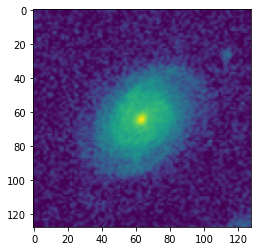

In [56]:
im = Image.open(f'./data/images/autoscale/{npix}pix/{f["sdss_id"][0]}.png')
arr = np.array(im)
print(arr.dtype, arr.shape)
plt.imshow(arr)

# Split in train, validation, test

In [7]:
# Run this for npix in [69, 128]
from pathlib import Path
import shutil

npix = 128

for ds in ['train', 'val', 'test']:
    labels = np.loadtxt(f'./data/split/{ds}_labels.txt', dtype=np.int)
    newdir = Path(f'./data/images/{npix}pix_split/{ds}/')
    newdir.mkdir(parents=True, exist_ok=True)
    newdir = str(newdir)  # necessary for shutil.copy
    print(f'Copying {ds} images ({npix}x{npix}) to {newdir}')
    for label in labels:
        shutil.copy(f'./data/images/{npix}pix/{label}.png', newdir)

Copying train images (128x128) to data/images/128pix_split/train
Copying val images (128x128) to data/images/128pix_split/val
Copying test images (128x128) to data/images/128pix_split/test


# Download png images
Get the dataset from the dropbox link.

In [49]:
npix = 128

In [ ]:
!curl -L -o data/images/autoscale/{npix}pix.tar.gz https://www.dropbox.com/s/5tayy6ehh0xkylt/images_69pix.tar.gz?dl=1

In [48]:
os.chdir('data/images/autoscale/')

In [ ]:
!tar -xzf {npix}pix.tar.gz

# To .npy

Train, validation, and test images each are saved as a .npy file.

In [19]:
from morphoml.dataprep import load_folder

npix = 69
basedir = f'./data/images/{npix}pix_npy/'

def npsave(filename, arr):
    if os.path.exists(filename):
        print(f'Skipping {filename}, since it already exists.')
        return
    np.save(filename, arr)
    
for dset in ['train', 'val', 'test']:
    imgs, names = load_folder(f'./data/images/{npix}pix_split/{dset}/')
    if len(names) > 10000:
        npsave(f'{basedir}{dset}_images_all.npy', imgs)
        npsave(f'{basedir}{dset}_names_all.npy', names)
        imgs, names = imgs[:10000], names[:10000]
    npsave(f'{basedir}{dset}_images.npy', imgs)
    npsave(f'{basedir}{dset}_names.npy', names)

Skipping ./data/images/69pix_npy/train_images_all.npy, since it already exists.
Skipping ./data/images/69pix_npy/train_names_all.npy, since it already exists.
Skipping ./data/images/69pix_npy/val_images.npy, since it already exists.
Skipping ./data/images/69pix_npy/val_names.npy, since it already exists.
Skipping ./data/images/69pix_npy/test_images.npy, since it already exists.
Skipping ./data/images/69pix_npy/test_names.npy, since it already exists.


In [21]:
imgs.shape

(5000, 69, 69)

# Example images

In [23]:
import os
from ipywidgets import interact
import matplotlib.pyplot as plt

npix = 128
basedir = f'./data/images/autoscale/{npix}pix/'
def valid_filename(filename): return filename[-3:] == 'png'
filenames = list(filter(valid_filename, os.listdir(basedir)))

def plot_gal(i):
    filename = filenames[i]
    img = np.array(Image.open(os.path.join(basedir, filename)))
    plt.imshow(img, origin='lower')
    plt.suptitle(filename[:-4])
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
    
interact(plot_gal, i=(0, 1000))

interactive(children=(IntSlider(value=500, description='i', max=1000), Output()), _dom_classes=('widget-intera…

<function __main__.plot_gal(i)>

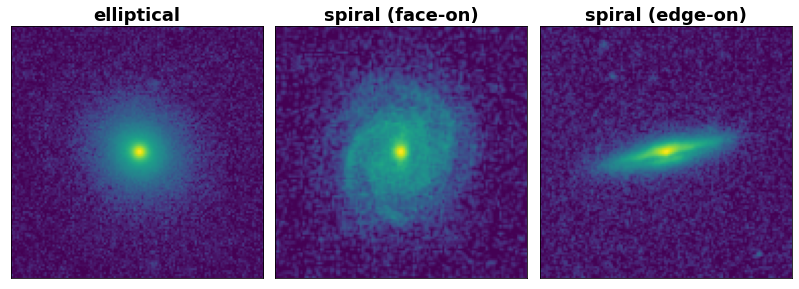

In [24]:
id_elliptical = 1237654880743849993
id_edgeon = 1237661434851426476
id_faceon = 1237662640658776331
d_ids = {'elliptical': '1237654880743849993', 'spiral (face-on)': '1237662640658776331',
         'spiral (edge-on)': '1237661434851426476'}
f, axarr = plt.subplots(ncols=3, figsize=(14, 6), gridspec_kw={'wspace': 0.05})
for ax, (name, idx) in zip(axarr, d_ids.items()):
    img = np.array(Image.open(os.path.join(basedir, idx + '.png')))
    ax.imshow(img, origin='lower')
    ax.set_title(name, fontsize=18, fontweight='bold')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.savefig('plots/example_galaxies.png', bbox_inches='tight')

In [33]:
!cd data/images/autoscale/test

In [47]:
!curl -L -o data/images/autoscale/test/dropboxdl2.tar.gz https://www.dropbox.com/s/5tayy6ehh0xkylt/images_69pix.tar.gz?dl=1

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 11  261M   11 30.7M    0     0  5069k      0  0:00:52  0:00:06  0:00:46 6687k^C


In [39]:
os.chdir('data/images/autoscale/test')

In [45]:
os.chdir('../../../..')

In [35]:
!cd data

In [46]:
!pwd

/morphoml


In [38]:
!mv dropboxdl.tar.gz data/images/autoscale/test/

In [44]:
!rm -r 69pix

In [43]:
!tar -xzf dropboxdl.tar.gz

In [31]:
!ls

 Dockerfile   data   dropboxdl.tar.gz		 morphoml    plots
 README.md    docs  'images_69pix.tar.gz?dl=1'	 notebooks   resources


In [26]:
!curl --version

curl 7.58.0 (x86_64-pc-linux-gnu) libcurl/7.58.0 OpenSSL/1.1.1 zlib/1.2.11 libidn2/2.0.4 libpsl/0.19.1 (+libidn2/2.0.4) nghttp2/1.30.0 librtmp/2.3
Release-Date: 2018-01-24
Protocols: dict file ftp ftps gopher http https imap imaps ldap ldaps pop3 pop3s rtmp rtsp smb smbs smtp smtps telnet tftp 
Features: AsynchDNS IDN IPv6 Largefile GSS-API Kerberos SPNEGO NTLM NTLM_WB SSL libz TLS-SRP HTTP2 UnixSockets HTTPS-proxy PSL 
